In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data_bunch = fetch_openml("mnist_784", as_frame=False)
data = data_bunch["data"]
X, y = data_bunch["data"], data_bunch["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<Figure size 800x800 with 0 Axes>

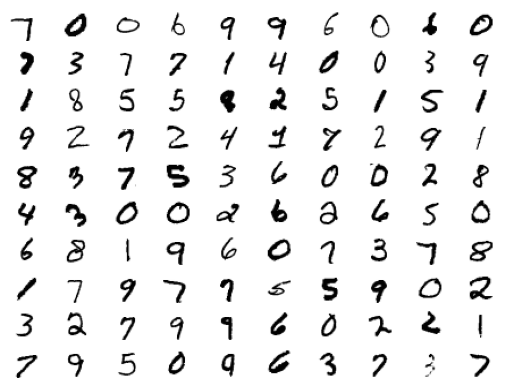

In [7]:
plt.figure(figsize=(8, 8))
fig, axis = plt.subplots(10, 10)
plt.grid(False)

for i in range(10):
    for j in range(10):
        ax = axis[i, j]
        rand = np.random.randint(0, len(X_train))

        ax.axis("off")
        ax.imshow(X_train[rand].reshape(28, 28), cmap="binary")

plt.show()

## Selecting Classifiers

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Logistic Regression

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1)
cross_val_score(log_reg, X_train, y_train, n_jobs=-1)

array([0.91607143, 0.91794643, 0.92017857, 0.91714286, 0.91830357])

In [9]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=3, n_jobs=-1)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, log_reg_pred, normalize="true")

array([[9.64661109e-01, 1.81225082e-04, 4.71185212e-03, 1.99347590e-03,
        2.17470098e-03, 8.33635375e-03, 7.24900326e-03, 2.89960130e-03,
        6.88655310e-03, 9.06125408e-04],
       [1.58579131e-04, 9.72565810e-01, 4.91595306e-03, 3.17158262e-03,
        9.51474786e-04, 3.48874088e-03, 7.92895655e-04, 2.06152870e-03,
        9.67332699e-03, 2.22010783e-03],
       [7.35689934e-03, 1.04073210e-02, 8.93773551e-01, 1.88408398e-02,
        1.07661942e-02, 4.48591423e-03, 1.07661942e-02, 1.14839404e-02,
        2.78126682e-02, 4.30647766e-03],
       [3.32342137e-03, 3.84817212e-03, 2.50131188e-02, 8.86653839e-01,
        1.39933532e-03, 3.21847123e-02, 3.14850446e-03, 9.27059647e-03,
        2.43134511e-02, 1.08448487e-02],
       [3.12845050e-03, 4.41663600e-03, 7.54508649e-03, 2.39234450e-03,
        9.27309533e-01, 1.28818550e-03, 8.28119249e-03, 4.41663600e-03,
        8.46521899e-03, 3.27567170e-02],
       [1.29946840e-02, 3.54400473e-03, 8.46623351e-03, 3.95747194e-02,
   

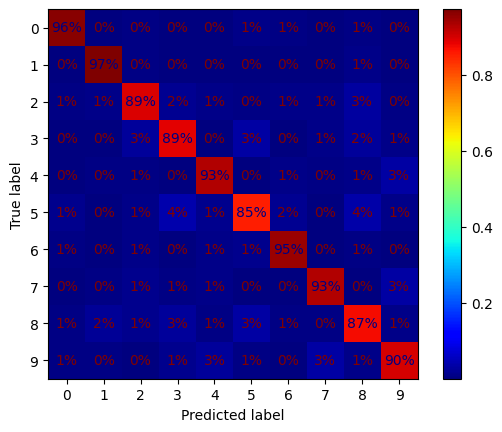

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_pred, normalize="true", values_format=".0%", cmap="jet")
plt.show()

In [ ]:
sample_weight = (log_reg_pred != y_train).astype(int)

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", cmap="jet")
plt.show()

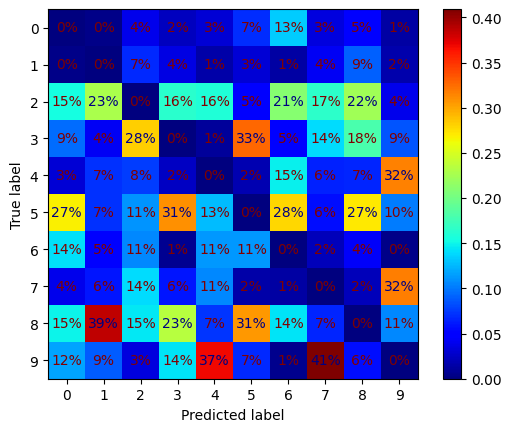

In [63]:
ConfusionMatrixDisplay.from_predictions(y_train, log_reg_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%", cmap="jet")
plt.show()

In [67]:
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_train, log_reg_pred, average="macro")
acc = accuracy_score(y_train, log_reg_pred)

print(f1, acc)

0.9162812304284703 0.9173928571428571


### SGDClassifier

In [65]:
from sklearn.linear_model import SGDClassifier

sgd_clr = SGDClassifier(n_jobs=-1)
cross_val_score(sgd_clr, X_train, y_train, cv=3, n_jobs=-1)

array([0.8864306 , 0.86366315, 0.88578164])

In [68]:
sgd_clr_pred = cross_val_predict(sgd_clr, X_train, y_train, cv=3, n_jobs=-1)

f1 = f1_score(y_train, sgd_clr_pred, average="macro")
acc = accuracy_score(y_train, sgd_clr_pred)

print(f1, acc)

0.8768165294408699 0.8782857142857143


### KNeighborsClassifiers

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clr = KNeighborsClassifier(n_jobs=-1)
cross_val_score(knn_clr, X_train, y_train, cv=3, n_jobs=-1)

array([0.96517919, 0.96769701, 0.96973106])

In [15]:
knn_clr_pred = cross_val_predict(knn_clr, X_train, y_train, cv=3, n_jobs=-1)

f1 = f1_score(y_train, knn_clr_pred, average="macro")
acc = accuracy_score(y_train, knn_clr_pred)

print(f1, acc)

0.9674085811267661 0.9675357142857143


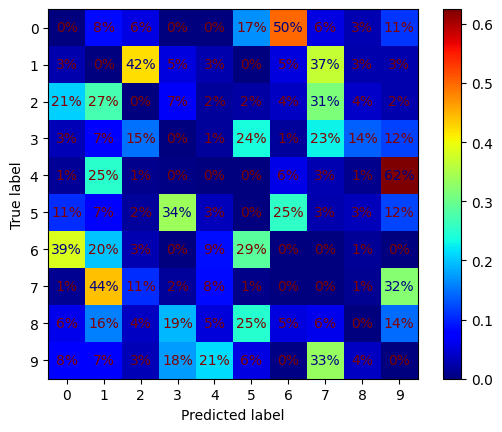

In [18]:
sample_weight = (knn_clr_pred != y_train).astype(int)
ConfusionMatrixDisplay.from_predictions(y_train, knn_clr_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", cmap="jet")

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = {
    "n_neighbors": [5, 8, 10],
    "weights": ["uniform", "distance"]
}
grid_search = GridSearchCV(knn_clr, grid_params, n_jobs=3, cv=3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=3,
             param_grid={'n_neighbors': [5, 8, 10],
                         'weights': ['uniform', 'distance']})

In [23]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_clr = KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights="distance")
cross_val_score(knn_clr, X_train_augmented, y_train, cv=3, n_jobs=-1)

array([0.93689398, 0.94123319, 0.9393014 ])

### Data augmenation

In [96]:
from scipy.ndimage import rotate, shift

def augment_image(img):
    img = img.reshape(28, 28)
    a = shift(img, shift=(1, 0))
    b = shift(img, shift=(0, 1))
    c = shift(img, shift=(-1, 0))
    d = shift(img, shift=(0, -1))
    e = img
    return [item.flatten() for item in (a, b, c, d, e)]

X_train_augmented = []
y_train_augmented = []

for X, y in zip(X_train, y_train):
    imgs = augment_image(X)
    for img in imgs:
        X_train_augmented.append(img)
        y_train_augmented.append(y)

In [97]:
from sklearn.utils import shuffle

X_combined, y_combined = shuffle(X_train_augmented, y_train_augmented, random_state=42)

In [98]:
cross_val_score(knn_clr, X_combined, y_combined, cv=3, n_jobs=-1)

array([0.98315726, 0.9826428 , 0.98231065])

In [ ]:
y_pred_t = cross_val_predict(knn_clr, X_train, y_train, cv=3, n_jobs=-1)

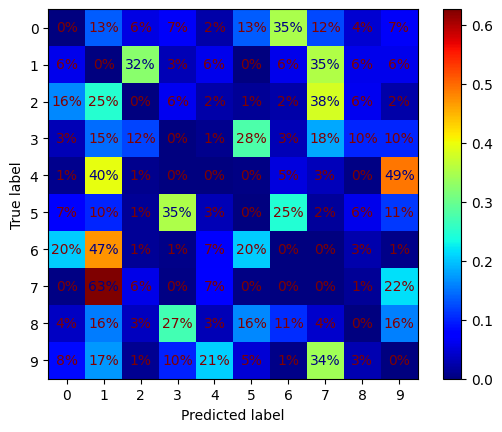

In [92]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_t, sample_weight = y_pred_t != y_train, values_format=".0%", normalize="true", cmap="jet")
plt.show()